In [22]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt 

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Read the CSV file
df = pd.read_csv("Agmar.csv")



In [25]:

df['Price Date'] = pd.to_datetime(df['Price Date'], format='%d-%b-%y')

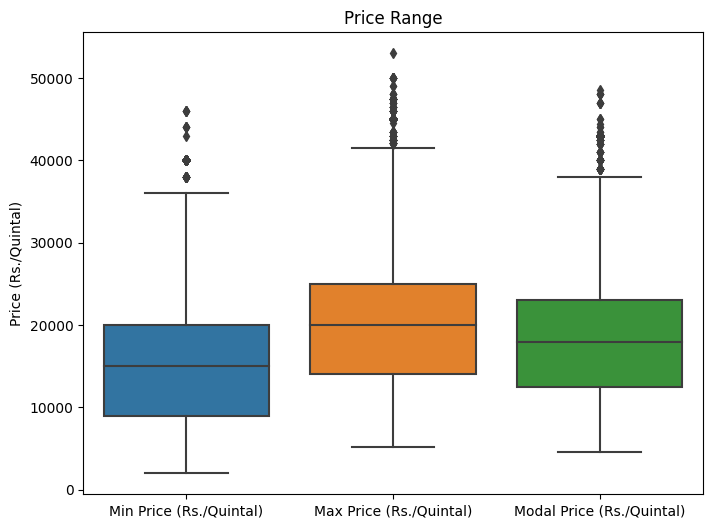

In [26]:
#Visualize the range of prices using a box plot:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df[['Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)', 'Modal Price (Rs./Quintal)']])
plt.ylabel('Price (Rs./Quintal)')
plt.title('Price Range')
plt.show()


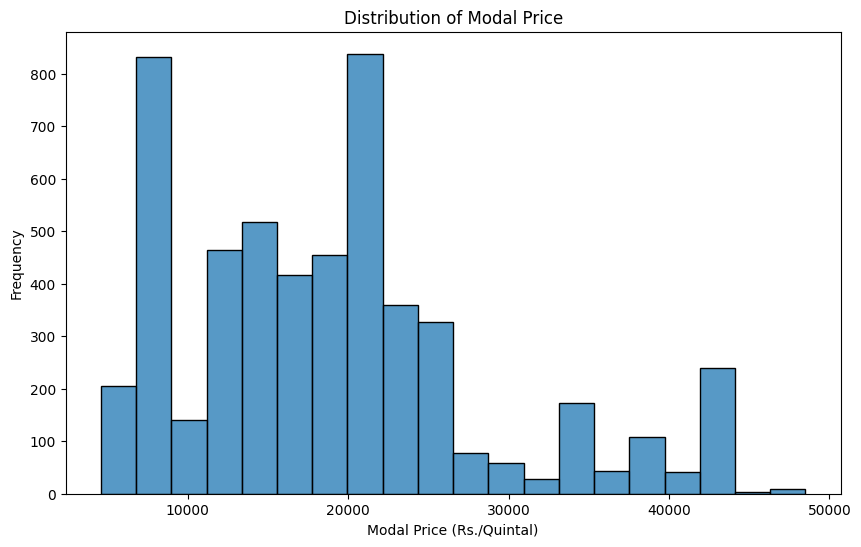

In [27]:
# Visualize the distribution of the target variable ("Modal Price (Rs./Quintal)"):


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Modal Price (Rs./Quintal)', bins=20)
plt.xlabel('Modal Price (Rs./Quintal)')
plt.ylabel('Frequency')
plt.title('Distribution of Modal Price')
plt.show()


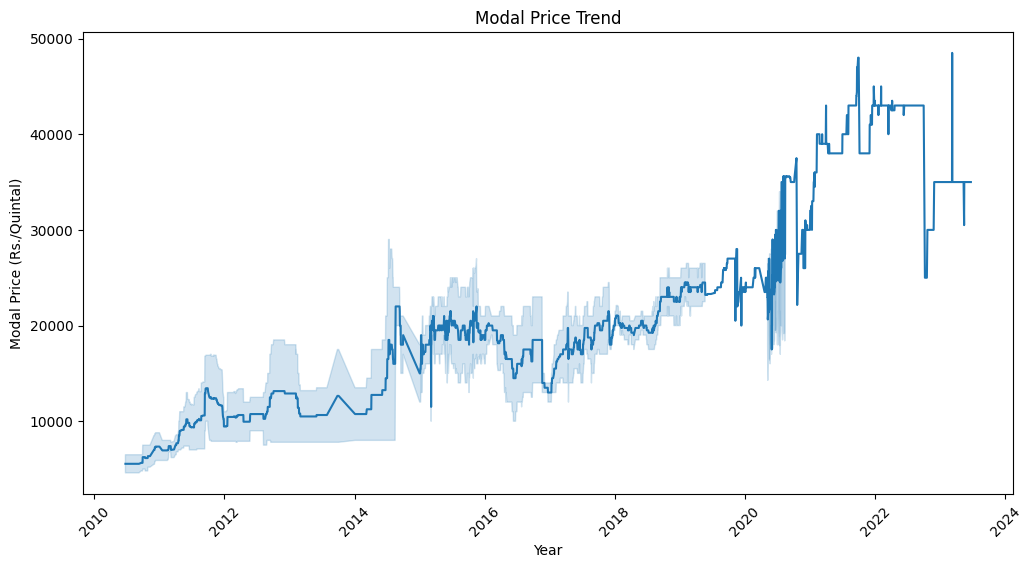

In [28]:
#Plot the trend of the modal price over time:

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Price Date', y='Modal Price (Rs./Quintal)')
plt.xlabel('Year')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Modal Price Trend')
plt.xticks(rotation=45)
plt.show()


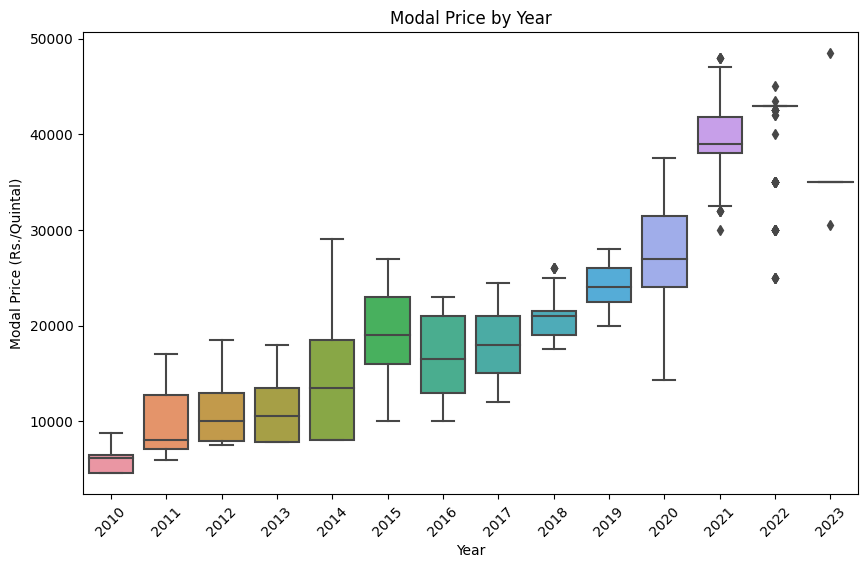

In [29]:
#Visualize the relationship between the modal price and the year:

df['Year'] = df['Price Date'].dt.year

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Year', y='Modal Price (Rs./Quintal)')
plt.xlabel('Year')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Modal Price by Year')
plt.xticks(rotation=45)
plt.show()


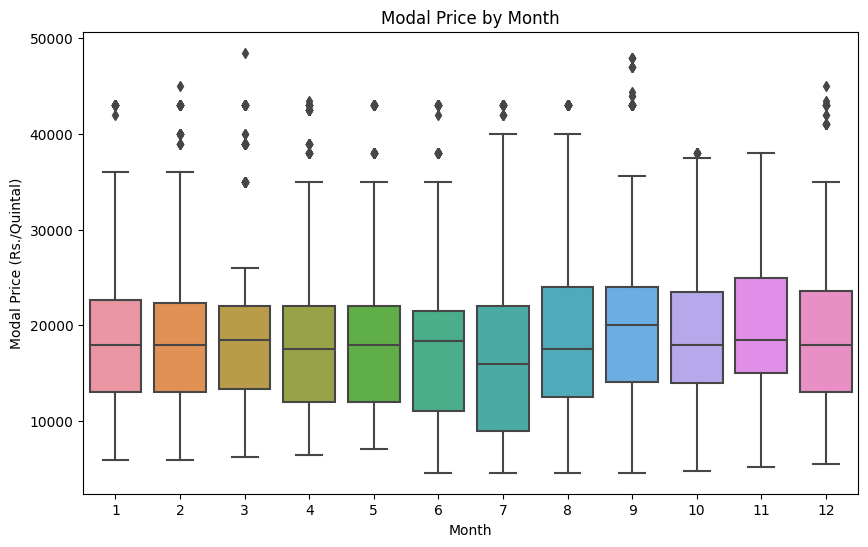

In [30]:
#Visualize the relationship between the modal price and the month:

df['Month'] = df['Price Date'].dt.month

plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Month', y='Modal Price (Rs./Quintal)')
plt.xlabel('Month')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Modal Price by Month')
plt.show()


In [31]:

# Preprocess the data
df['Price Date'] = pd.to_datetime(df['Price Date'])
df['Year'] = df['Price Date'].dt.year
df['Month'] = df['Price Date'].dt.month
df = df[['Year', 'Month', 'Modal Price (Rs./Quintal)']]

In [32]:
# Split into features and target
X = df[['Year', 'Month']]
y = df['Modal Price (Rs./Quintal)']


In [33]:
# Scale the features and target
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(np.array(y).reshape(-1, 1))

In [34]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=42)

In [35]:
# Reshape the input data for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))

In [42]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [43]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
134/134 [==============================] - 4s 21ms/step - loss: 0.0485
Epoch 2/100
134/134 [==============================] - 3s 19ms/step - loss: 0.0143
Epoch 3/100
134/134 [==============================] - 2s 18ms/step - loss: 0.0120
Epoch 4/100
134/134 [==============================] - 2s 18ms/step - loss: 0.0118
Epoch 5/100
134/134 [==============================] - 2s 18ms/step - loss: 0.0115
Epoch 6/100
134/134 [==============================] - 2s 18ms/step - loss: 0.0113
Epoch 7/100
134/134 [==============================] - 2s 18ms/step - loss: 0.0113
Epoch 8/100
134/134 [==============================] - 2s 17ms/step - loss: 0.0111
Epoch 9/100
134/134 [==============================] - 2s 18ms/step - loss: 0.0110
Epoch 10/100
134/134 [==============================] - 2s 18ms/step - loss: 0.0107
Epoch 11/100
134/134 [==============================] - 2s 17ms/step - loss: 0.0105
Epoch 12/100
134/134 [==============================] - 2s 17ms/step - loss: 0.0102
E

In [44]:
# Evaluate the model
mse = model.evaluate(X_test, y_test, verbose=0)
print('Mean Squared Error:', mse)

Mean Squared Error: 0.008694171905517578


In [45]:
# Make predictions
predictions1 = model.predict(X_test)

In [46]:
# Inverse transform the scaled predictions
predictions2 = scaler.inverse_transform(predictions1)

In [47]:
for i in range(len(y_test)):
    print('Actual:', scaler.inverse_transform(y_test[i].reshape(-1, 1))[0][0])
    print('Predicted:', predictions2[i][0])
    print()

Actual: 22500.0
Predicted: 23749.04

Actual: 13100.0
Predicted: 9572.922

Actual: 18000.0
Predicted: 17209.184

Actual: 26500.0
Predicted: 28881.664

Actual: 43000.0
Predicted: 41781.26

Actual: 4600.0
Predicted: 6308.063

Actual: 7900.0
Predicted: 9930.415

Actual: 13000.000000000002
Predicted: 18037.842

Actual: 8000.0
Predicted: 14833.602

Actual: 26500.0
Predicted: 24061.66

Actual: 43000.0
Predicted: 37533.76

Actual: 12800.000000000002
Predicted: 8888.775

Actual: 7000.0
Predicted: 8303.061

Actual: 24000.0
Predicted: 28159.525

Actual: 21000.0
Predicted: 15978.402

Actual: 22500.0
Predicted: 24241.668

Actual: 22500.0
Predicted: 23749.04

Actual: 35000.0
Predicted: 41305.87

Actual: 27000.0
Predicted: 27628.787

Actual: 20000.0
Predicted: 17702.266

Actual: 4800.0
Predicted: 8634.949

Actual: 21000.0
Predicted: 18705.012

Actual: 35000.0
Predicted: 32604.447

Actual: 35500.0
Predicted: 32604.447

Actual: 12500.0
Predicted: 11189.515

Actual: 43000.0
Predicted: 34860.617

Actual:

In [50]:
#Calculate and print the Mean Absolute Error (MAE):

from sklearn.metrics import mean_absolute_error

predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)


Mean Absolute Error: 0.07707305499839165


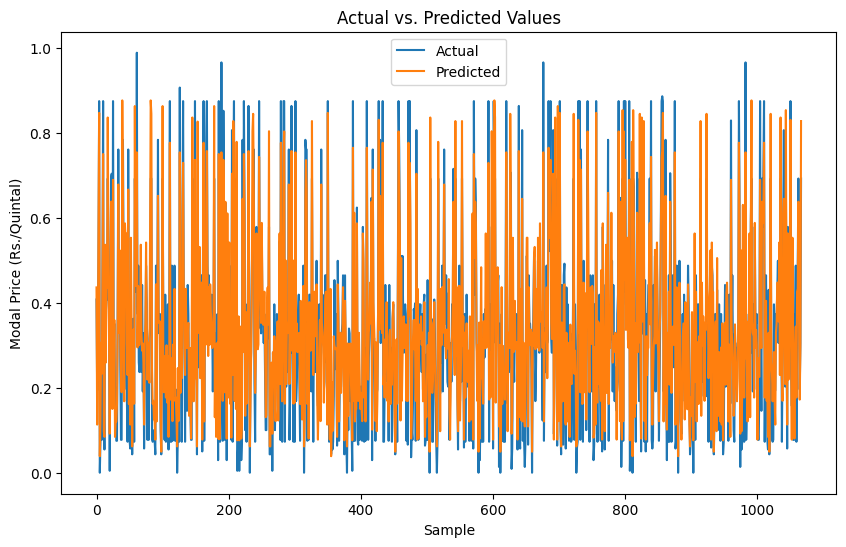

In [49]:
#Plot the actual vs. predicted values:
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.xlabel('Sample')
plt.ylabel('Modal Price (Rs./Quintal)')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()


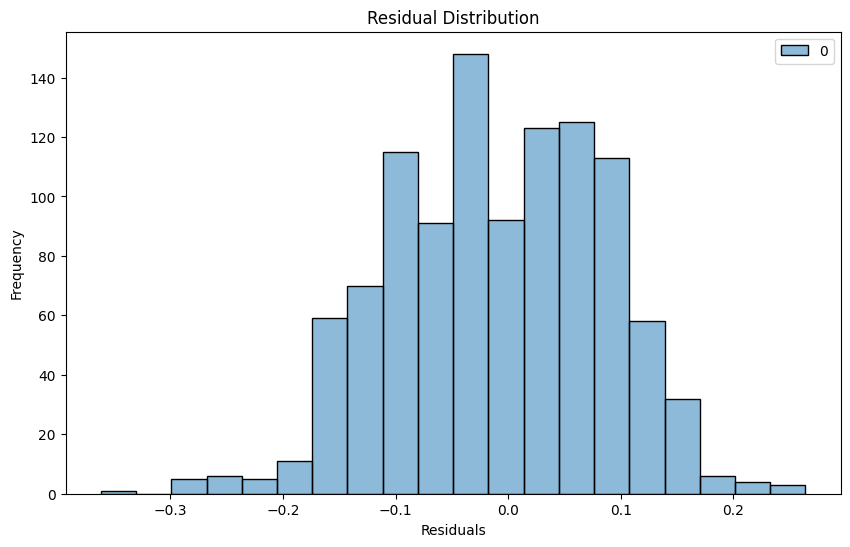

In [52]:

#Plot the residual distribution:
residuals = y_test - predictions

plt.figure(figsize=(10, 6))
sns.histplot(data=residuals, bins=20)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residual Distribution')
plt.show()


In [53]:
#Calculate and print the Coefficient of Determination (R-squared):
from sklearn.metrics import r2_score

r2 = r2_score(y_test, predictions)
print('R-squared:', r2)


R-squared: 0.8307412641520184
